## Using Pandas to Analyze a Barangay-level COVID-19 Dataset

As part of my journey toward data science, I have been studying Pandas, the most popular library in the scientific Python ecosystem for doing data analysis. In this post, I highlight some features of Pandas using a barangay-level dataset of COVID-19 cases in Malabon City. This Jupyter notebook is organized as follows. Section 1 imports libraries and reads raw data, and Section 2 tidies raw data. In Section 3, we perform simple data analysis and visualizations. The last section concludes.

### 1. Import libraries and read data

First, we import all necessary libraries: Pandas (of course), Matplotlib (for the data visualizations), and NumPy (for the numerical computations):

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

The raw data is available to the public and uploaded in my GitHub. Let's read the dataset from the GitHub repository:

In [274]:
url1 = 'https://raw.githubusercontent.com/jessonpagaduan/covid_malabon/master/covid_malabon_jupyter_june26.csv'
df1 = pd.read_csv(url1, header=0, index_col=0)

### 2. Tidying data

Let us have a quick snapshot of the dataset. The file contains longitudinal information on the cumulative number of confirmed cases, deaths, and recoveries for 23 sub-units in Malabon City (21 barangays, unconfirmed address, and outside the city) from 26 March 2020 to 26 June 2020. This gives a total of 2,139 observations.

In [275]:
df1.head()

,barangay,brgy,confirmed_cases,deaths,recovered
date,,,,,
26-Mar-20,1,Acacia,0,0,0
27-Mar-20,1,Acacia,0,0,0
28-Mar-20,1,Acacia,0,0,0
29-Mar-20,1,Acacia,0,0,0
30-Mar-20,1,Acacia,0,0,0


In [276]:
df1.tail()

,barangay,brgy,confirmed_cases,deaths,recovered
date,,,,,
22-Jun-20,23,Outside Malabon,4,0,3
23-Jun-20,23,Outside Malabon,4,0,3
24-Jun-20,23,Outside Malabon,4,0,3
25-Jun-20,23,Outside Malabon,4,0,3
26-Jun-20,23,Outside Malabon,4,0,3


In [277]:
df1.index

Index(['26-Mar-20', '27-Mar-20', '28-Mar-20', '29-Mar-20', '30-Mar-20',
       '31-Mar-20', '1-Apr-20', '2-Apr-20', '3-Apr-20', '4-Apr-20',
       ...
       '17-Jun-20', '18-Jun-20', '19-Jun-20', '20-Jun-20', '21-Jun-20',
       '22-Jun-20', '23-Jun-20', '24-Jun-20', '25-Jun-20', '26-Jun-20'],
      dtype='object', name='date', length=2139)

In [278]:
df1.brgy.unique()

array(['Acacia', 'Baritan', 'Bayan-Bayanan', 'Catmon', 'Concepcion',
       'Dampalit', 'Flores', 'Hulong Duhat', 'Ibaba', 'Longos', 'Maysilo',
       'Muzon', 'Niugan', 'Panghulo', 'Potrero', 'San Agustin',
       'Santulan', 'Tanong', 'Tinajeros', 'Tonsuya', 'Tugatog',
       'Unconfirmed Address', 'Outside Malabon'], dtype=object)

In [279]:
len(df1.brgy.unique())

23

In [280]:
df1.describe()

,barangay,confirmed_cases,deaths,recovered
count,2139.000000,2139.000000,2139.000000,2139.000000
mean,12.000000,5.326321,0.672744,1.789154
std,6.634801,8.928000,1.504114,3.552619
min,1.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000
50%,12.000000,2.000000,0.000000,0.000000
75%,18.000000,5.000000,1.000000,2.000000
max,23.000000,69.000000,12.000000,28.000000


Let us tidy things up in the raw file. First, let us parse the time series information, which are the dates, in the raw file and convert it to datetime64 dtype.

In [281]:
date = pd.to_datetime(df1.index)

In [282]:
date

DatetimeIndex(['2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04',
               ...
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26'],
              dtype='datetime64[ns]', name='date', length=2139, freq=None)

We can now construct our index. It has two levels, the barangay and the date.

In [283]:
index = pd.MultiIndex.from_arrays([df1.brgy, date], names=['brgy_name', 'date'])

In [284]:
index

MultiIndex([(         'Acacia', '2020-03-26'),
            (         'Acacia', '2020-03-27'),
            (         'Acacia', '2020-03-28'),
            (         'Acacia', '2020-03-29'),
            (         'Acacia', '2020-03-30'),
            (         'Acacia', '2020-03-31'),
            (         'Acacia', '2020-04-01'),
            (         'Acacia', '2020-04-02'),
            (         'Acacia', '2020-04-03'),
            (         'Acacia', '2020-04-04'),
            ...
            ('Outside Malabon', '2020-06-17'),
            ('Outside Malabon', '2020-06-18'),
            ('Outside Malabon', '2020-06-19'),
            ('Outside Malabon', '2020-06-20'),
            ('Outside Malabon', '2020-06-21'),
            ('Outside Malabon', '2020-06-22'),
            ('Outside Malabon', '2020-06-23'),
            ('Outside Malabon', '2020-06-24'),
            ('Outside Malabon', '2020-06-25'),
            ('Outside Malabon', '2020-06-26')],
           names=['brgy_name', 'date'], len

In [285]:
df1.set_index(index, inplace=True)

In [286]:
df1

barangay             brgy  confirmed_cases  \
brgy_name       date                                                     
Acacia          2020-03-26         1           Acacia                0   
                2020-03-27         1           Acacia                0   
                2020-03-28         1           Acacia                0   
                2020-03-29         1           Acacia                0   
                2020-03-30         1           Acacia                0   
...                              ...              ...              ...   
Outside Malabon 2020-06-22        23  Outside Malabon                4   
                2020-06-23        23  Outside Malabon                4   
                2020-06-24        23  Outside Malabon                4   
                2020-06-25        23  Outside Malabon                4   
                2020-06-26        23  Outside Malabon                4   

                            deaths  recovered  
brgy_name       date                           
Acacia          2020-03-26       0          0  
                2020-03-27       0          0  
                2020-03-28       0          0  
                2020-03-29       0          0  
                2020-03-30       0          0  
...                            ...        ...  
Outside Malabon 2020-06-22       0          3  
                2020-06-23       0          3  
                2020-06-24       0          3  
                2020-06-25       0          3  
                2020-06-26       0          3  

[2139 rows x 5 columns]

In [287]:
df1.index

MultiIndex([(         'Acacia', '2020-03-26'),
            (         'Acacia', '2020-03-27'),
            (         'Acacia', '2020-03-28'),
            (         'Acacia', '2020-03-29'),
            (         'Acacia', '2020-03-30'),
            (         'Acacia', '2020-03-31'),
            (         'Acacia', '2020-04-01'),
            (         'Acacia', '2020-04-02'),
            (         'Acacia', '2020-04-03'),
            (         'Acacia', '2020-04-04'),
            ...
            ('Outside Malabon', '2020-06-17'),
            ('Outside Malabon', '2020-06-18'),
            ('Outside Malabon', '2020-06-19'),
            ('Outside Malabon', '2020-06-20'),
            ('Outside Malabon', '2020-06-21'),
            ('Outside Malabon', '2020-06-22'),
            ('Outside Malabon', '2020-06-23'),
            ('Outside Malabon', '2020-06-24'),
            ('Outside Malabon', '2020-06-25'),
            ('Outside Malabon', '2020-06-26')],
           names=['brgy_name', 'date'], len

Renaming the column names:

In [288]:
df1.columns

Index(['barangay', 'brgy', 'confirmed_cases', 'deaths', 'recovered'], dtype='object')

In [289]:
del df1['brgy']

In [290]:
df1.columns = ['brgy_id', 'confirmed', 'death', 'recovered']

In [291]:
df1

brgy_id  confirmed  death  recovered
brgy_name       date                                            
Acacia          2020-03-26        1          0      0          0
                2020-03-27        1          0      0          0
                2020-03-28        1          0      0          0
                2020-03-29        1          0      0          0
                2020-03-30        1          0      0          0
...                             ...        ...    ...        ...
Outside Malabon 2020-06-22       23          4      0          3
                2020-06-23       23          4      0          3
                2020-06-24       23          4      0          3
                2020-06-25       23          4      0          3
                2020-06-26       23          4      0          3

[2139 rows x 4 columns]

Incoporating demographic data allows for a richer analysis. Let's create a data frame from a dictionary of population, area, and population density lists, data taken from the National Statistical Coordination Board (NSCB). We also exploit number of violators data taken from the Philippine National Police (PNP).

In [699]:
url2 = 'https://raw.githubusercontent.com/jessonpagaduan/covid_malabon/master/pop-violators.csv'

In [700]:
df2 = pd.read_csv(url2, index_col=0)

In [701]:
df3 = df1.join(df2, on='brgy_name')

In [702]:
df3

brgy_id  confirmed  death  recovered  district  \
brgy_name       date                                                         
Acacia          2020-03-26        1          0      0          0       2.0   
                2020-03-27        1          0      0          0       2.0   
                2020-03-28        1          0      0          0       2.0   
                2020-03-29        1          0      0          0       2.0   
                2020-03-30        1          0      0          0       2.0   
...                             ...        ...    ...        ...       ...   
Outside Malabon 2020-06-22       23          4      0          3       NaN   
                2020-06-23       23          4      0          3       NaN   
                2020-06-24       23          4      0          3       NaN   
                2020-06-25       23          4      0          3       NaN   
                2020-06-26       23          4      0          3       NaN   

                            population   area  popden  violators  
brgy_name       date                                              
Acacia          2020-03-26      5735.0  19.54   293.5      294.0  
                2020-03-27      5735.0  19.54   293.5      294.0  
                2020-03-28      5735.0  19.54   293.5      294.0  
                2020-03-29      5735.0  19.54   293.5      294.0  
                2020-03-30      5735.0  19.54   293.5      294.0  
...                                ...    ...     ...        ...  
Outside Malabon 2020-06-22         NaN    NaN     NaN        NaN  
                2020-06-23         NaN    NaN     NaN        NaN  
                2020-06-24         NaN    NaN     NaN        NaN  
                2020-06-25         NaN    NaN     NaN        NaN  
                2020-06-26         NaN    NaN     NaN        NaN  

[2139 rows x 9 columns]

In [703]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2139 entries, ('Acacia', Timestamp('2020-03-26 00:00:00')) to ('Outside Malabon', Timestamp('2020-06-26 00:00:00'))
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brgy_id     2139 non-null   int64  
 1   confirmed   2139 non-null   int64  
 2   death       2139 non-null   int64  
 3   recovered   2139 non-null   int64  
 4   district    1953 non-null   float64
 5   population  1953 non-null   float64
 6   area        1953 non-null   float64
 7   popden      1953 non-null   float64
 8   violators   1953 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 235.6+ KB


In [704]:
df3.fillna(0, inplace=True)
df3.loc[:, ['district', 'population', 'violators']] = df3.loc[:, ['district', 'population', 'violators']].astype('int64')

In [705]:
df3

brgy_id  confirmed  death  recovered  district  \
brgy_name       date                                                         
Acacia          2020-03-26        1          0      0          0         2   
                2020-03-27        1          0      0          0         2   
                2020-03-28        1          0      0          0         2   
                2020-03-29        1          0      0          0         2   
                2020-03-30        1          0      0          0         2   
...                             ...        ...    ...        ...       ...   
Outside Malabon 2020-06-22       23          4      0          3         0   
                2020-06-23       23          4      0          3         0   
                2020-06-24       23          4      0          3         0   
                2020-06-25       23          4      0          3         0   
                2020-06-26       23          4      0          3         0   

                            population   area  popden  violators  
brgy_name       date                                              
Acacia          2020-03-26        5735  19.54   293.5        294  
                2020-03-27        5735  19.54   293.5        294  
                2020-03-28        5735  19.54   293.5        294  
                2020-03-29        5735  19.54   293.5        294  
                2020-03-30        5735  19.54   293.5        294  
...                                ...    ...     ...        ...  
Outside Malabon 2020-06-22           0   0.00     0.0          0  
                2020-06-23           0   0.00     0.0          0  
                2020-06-24           0   0.00     0.0          0  
                2020-06-25           0   0.00     0.0          0  
                2020-06-26           0   0.00     0.0          0  

[2139 rows x 9 columns]

In [707]:
df3 = df3[['brgy_id', 'district', 'population', 'area', 'popden', 'confirmed', 'death', 'recovered', 'violators']]

In [708]:
df3

brgy_id  district  population   area  popden  \
brgy_name       date                                                       
Acacia          2020-03-26        1         2        5735  19.54   293.5   
                2020-03-27        1         2        5735  19.54   293.5   
                2020-03-28        1         2        5735  19.54   293.5   
                2020-03-29        1         2        5735  19.54   293.5   
                2020-03-30        1         2        5735  19.54   293.5   
...                             ...       ...         ...    ...     ...   
Outside Malabon 2020-06-22       23         0           0   0.00     0.0   
                2020-06-23       23         0           0   0.00     0.0   
                2020-06-24       23         0           0   0.00     0.0   
                2020-06-25       23         0           0   0.00     0.0   
                2020-06-26       23         0           0   0.00     0.0   

                            confirmed  death  recovered  violators  
brgy_name       date                                                
Acacia          2020-03-26          0      0          0        294  
                2020-03-27          0      0          0        294  
                2020-03-28          0      0          0        294  
                2020-03-29          0      0          0        294  
                2020-03-30          0      0          0        294  
...                               ...    ...        ...        ...  
Outside Malabon 2020-06-22          4      0          3          0  
                2020-06-23          4      0          3          0  
                2020-06-24          4      0          3          0  
                2020-06-25          4      0          3          0  
                2020-06-26          4      0          3          0  

[2139 rows x 9 columns]

Since the dataset is barangay-level, we can generate a set of series for city-wide variables. Appending this to our current dataframe allows us to do both city-wide and barangay-level data analysis.

In [709]:
malabon = df3.sum(level=1)

In [710]:
malabon

,brgy_id,district,population,area,popden,confirmed,death,recovered,violators
date,,,,,,,,,
2020-03-26,276,27,353335,1570.52,6971.95,0,0,0,8593
2020-03-27,276,27,353335,1570.52,6971.95,0,0,0,8593
2020-03-28,276,27,353335,1570.52,6971.95,0,0,0,8593
2020-03-29,276,27,353335,1570.52,6971.95,0,0,0,8593
2020-03-30,276,27,353335,1570.52,6971.95,0,0,0,8593
...,...,...,...,...,...,...,...,...,...
2020-06-22,276,27,353335,1570.52,6971.95,368,48,152,8593
2020-06-23,276,27,353335,1570.52,6971.95,385,48,156,8593
2020-06-24,276,27,353335,1570.52,6971.95,394,49,160,8593


In [711]:
malabon['brgy_id'] = 24
malabon['district'] = 0

In [712]:
malabon.insert(0, 'brgy_name', 'Malabon City')

In [713]:
malabon

,brgy_name,brgy_id,district,population,area,popden,confirmed,death,recovered,violators
date,,,,,,,,,,
2020-03-26,Malabon City,24,0,353335,1570.52,6971.95,0,0,0,8593
2020-03-27,Malabon City,24,0,353335,1570.52,6971.95,0,0,0,8593
2020-03-28,Malabon City,24,0,353335,1570.52,6971.95,0,0,0,8593
2020-03-29,Malabon City,24,0,353335,1570.52,6971.95,0,0,0,8593
2020-03-30,Malabon City,24,0,353335,1570.52,6971.95,0,0,0,8593
...,...,...,...,...,...,...,...,...,...,...
2020-06-22,Malabon City,24,0,353335,1570.52,6971.95,368,48,152,8593
2020-06-23,Malabon City,24,0,353335,1570.52,6971.95,385,48,156,8593
2020-06-24,Malabon City,24,0,353335,1570.52,6971.95,394,49,160,8593


In [714]:
type(malabon)

pandas.core.frame.DataFrame

In [715]:
malabon.index

DatetimeIndex(['2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
               '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
               '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
      

In [716]:
malabon.set_index(['brgy_name', malabon.index], inplace=True)

In [717]:
malabon

brgy_id  district  population     area   popden  \
brgy_name    date                                                          
Malabon City 2020-03-26       24         0      353335  1570.52  6971.95   
             2020-03-27       24         0      353335  1570.52  6971.95   
             2020-03-28       24         0      353335  1570.52  6971.95   
             2020-03-29       24         0      353335  1570.52  6971.95   
             2020-03-30       24         0      353335  1570.52  6971.95   
...                          ...       ...         ...      ...      ...   
             2020-06-22       24         0      353335  1570.52  6971.95   
             2020-06-23       24         0      353335  1570.52  6971.95   
             2020-06-24       24         0      353335  1570.52  6971.95   
             2020-06-25       24         0      353335  1570.52  6971.95   
             2020-06-26       24         0      353335  1570.52  6971.95   

                         confirmed  death  recovered  violators  
brgy_name    date                                                
Malabon City 2020-03-26          0      0          0       8593  
             2020-03-27          0      0          0       8593  
             2020-03-28          0      0          0       8593  
             2020-03-29          0      0          0       8593  
             2020-03-30          0      0          0       8593  
...                            ...    ...        ...        ...  
             2020-06-22        368     48        152       8593  
             2020-06-23        385     48        156       8593  
             2020-06-24        394     49        160       8593  
             2020-06-25        401     51        161       8593  
             2020-06-26        415     53        168       8593  

[93 rows x 9 columns]

In [718]:
df3 = df3.append(malabon)

In [719]:
df3

brgy_id  district  population     area   popden  \
brgy_name    date                                                          
Acacia       2020-03-26        1         2        5735    19.54   293.50   
             2020-03-27        1         2        5735    19.54   293.50   
             2020-03-28        1         2        5735    19.54   293.50   
             2020-03-29        1         2        5735    19.54   293.50   
             2020-03-30        1         2        5735    19.54   293.50   
...                          ...       ...         ...      ...      ...   
Malabon City 2020-06-22       24         0      353335  1570.52  6971.95   
             2020-06-23       24         0      353335  1570.52  6971.95   
             2020-06-24       24         0      353335  1570.52  6971.95   
             2020-06-25       24         0      353335  1570.52  6971.95   
             2020-06-26       24         0      353335  1570.52  6971.95   

                         confirmed  death  recovered  violators  
brgy_name    date                                                
Acacia       2020-03-26          0      0          0        294  
             2020-03-27          0      0          0        294  
             2020-03-28          0      0          0        294  
             2020-03-29          0      0          0        294  
             2020-03-30          0      0          0        294  
...                            ...    ...        ...        ...  
Malabon City 2020-06-22        368     48        152       8593  
             2020-06-23        385     48        156       8593  
             2020-06-24        394     49        160       8593  
             2020-06-25        401     51        161       8593  
             2020-06-26        415     53        168       8593  

[2232 rows x 9 columns]

We can create a new column for active cases and, using demographic data, variables in per capita terms. We can also generate daily new cases, deaths, and recoveries from the cumulative counts as well as seven-day moving averages.

In [720]:
df3 = df3.assign(active = lambda x: x.confirmed - x.death - x.recovered)
df3 = df3.assign(confirmed_pc_4k = lambda x: 4000 * x.confirmed / x.population)
df3 = df3.assign(death_pc_4k = lambda x: 4000 * x.death / x.population)
df3 = df3.assign(recovered_pc_4k = lambda x: 4000 * x.recovered / x.population)
df3 = df3.assign(death_pc_4k = lambda x: 4000 * x.death / x.population)

In [721]:
df3.replace(np.inf, 0, inplace=True)
df3.fillna(0, inplace=True)
df3.astype('int64')

brgy_id  district  population  area  popden  \
brgy_name    date                                                      
Acacia       2020-03-26        1         2        5735    19     293   
             2020-03-27        1         2        5735    19     293   
             2020-03-28        1         2        5735    19     293   
             2020-03-29        1         2        5735    19     293   
             2020-03-30        1         2        5735    19     293   
...                          ...       ...         ...   ...     ...   
Malabon City 2020-06-22       24         0      353335  1570    6971   
             2020-06-23       24         0      353335  1570    6971   
             2020-06-24       24         0      353335  1570    6971   
             2020-06-25       24         0      353335  1570    6971   
             2020-06-26       24         0      353335  1570    6971   

                         confirmed  death  recovered  violators  active  \
brgy_name    date                                                         
Acacia       2020-03-26          0      0          0        294       0   
             2020-03-27          0      0          0        294       0   
             2020-03-28          0      0          0        294       0   
             2020-03-29          0      0          0        294       0   
             2020-03-30          0      0          0        294       0   
...                            ...    ...        ...        ...     ...   
Malabon City 2020-06-22        368     48        152       8593     168   
             2020-06-23        385     48        156       8593     181   
             2020-06-24        394     49        160       8593     185   
             2020-06-25        401     51        161       8593     189   
             2020-06-26        415     53        168       8593     194   

                         confirmed_pc_4k  death_pc_4k  recovered_pc_4k  
brgy_name    date                                                       
Acacia       2020-03-26                0            0                0  
             2020-03-27                0            0                0  
             2020-03-28                0            0                0  
             2020-03-29                0            0                0  
             2020-03-30                0            0                0  
...                                  ...          ...              ...  
Malabon City 2020-06-22                4            0                1  
             2020-06-23                4            0                1  
             2020-06-24                4            0                1  
             2020-06-25                4            0                1  
             2020-06-26                4            0                1  

[2232 rows x 13 columns]

In [723]:
df3.groupby(level=0).max().iloc[:, 10:].sort_values(by='confirmed_pc_4k', ascending=False).astype('int64')

,confirmed_pc_4k,death_pc_4k,recovered_pc_4k
brgy_name,,,
Ibaba,13,1,5
Bayan-Bayanan,10,2,2
Niugan,10,0,5
San Agustin,8,0,2
Tanong,7,1,1
Muzon,7,0,0
Tinajeros,6,1,2
Tugatog,6,0,2
Longos,5,0,2


In [728]:
df3.groupby(level=0).diff().loc[:, ['confirmed', 'death', 'recovered', 'active']]

confirmed  death  recovered  active
brgy_name    date                                           
Acacia       2020-03-26        NaN    NaN        NaN     NaN
             2020-03-27        0.0    0.0        0.0     0.0
             2020-03-28        0.0    0.0        0.0     0.0
             2020-03-29        0.0    0.0        0.0     0.0
             2020-03-30        0.0    0.0        0.0     0.0
...                            ...    ...        ...     ...
Malabon City 2020-06-22        7.0    0.0        5.0     2.0
             2020-06-23       17.0    0.0        4.0    13.0
             2020-06-24        9.0    1.0        4.0     4.0
             2020-06-25        7.0    2.0        1.0     4.0
             2020-06-26       14.0    2.0        7.0     5.0

[2232 rows x 4 columns]

In [729]:
df3[['new_case', 'new_death', 'new_recovered', 'new_active']] = df3.groupby(level=0).diff().loc[:, ['confirmed', 'death', 'recovered', 'active']]

In [730]:
df3.fillna(0, inplace=True)
df3.astype('int64')

brgy_id  district  population  area  popden  \
brgy_name    date                                                      
Acacia       2020-03-26        1         2        5735    19     293   
             2020-03-27        1         2        5735    19     293   
             2020-03-28        1         2        5735    19     293   
             2020-03-29        1         2        5735    19     293   
             2020-03-30        1         2        5735    19     293   
...                          ...       ...         ...   ...     ...   
Malabon City 2020-06-22       24         0      353335  1570    6971   
             2020-06-23       24         0      353335  1570    6971   
             2020-06-24       24         0      353335  1570    6971   
             2020-06-25       24         0      353335  1570    6971   
             2020-06-26       24         0      353335  1570    6971   

                         confirmed  death  recovered  violators  active  \
brgy_name    date                                                         
Acacia       2020-03-26          0      0          0        294       0   
             2020-03-27          0      0          0        294       0   
             2020-03-28          0      0          0        294       0   
             2020-03-29          0      0          0        294       0   
             2020-03-30          0      0          0        294       0   
...                            ...    ...        ...        ...     ...   
Malabon City 2020-06-22        368     48        152       8593     168   
             2020-06-23        385     48        156       8593     181   
             2020-06-24        394     49        160       8593     185   
             2020-06-25        401     51        161       8593     189   
             2020-06-26        415     53        168       8593     194   

                         confirmed_pc_4k  death_pc_4k  recovered_pc_4k  \
brgy_name    date                                                        
Acacia       2020-03-26                0            0                0   
             2020-03-27                0            0                0   
             2020-03-28                0            0                0   
             2020-03-29                0            0                0   
             2020-03-30                0            0                0   
...                                  ...          ...              ...   
Malabon City 2020-06-22                4            0                1   
             2020-06-23                4            0                1   
             2020-06-24                4            0                1   
             2020-06-25                4            0                1   
             2020-06-26                4            0                1   

                         new_case  new_death  new_recovered  new_active  
brgy_name    date                                                        
Acacia       2020-03-26         0          0              0           0  
             2020-03-27         0          0              0           0  
             2020-03-28         0          0              0           0  
             2020-03-29         0          0              0           0  
             2020-03-30         0          0              0           0  
...                           ...        ...            ...         ...  
Malabon City 2020-06-22         7          0              5           2  
             2020-06-23        17          0              4          13  
             2020-06-24         9          1              4           4  
             2020-06-25         7          2              1           4  
             2020-06-26        14          2              7           5  

[2232 rows x 17 columns]

In [732]:
df3.groupby(level=0).rolling(7).mean().iloc[:, 13:]

new_case  new_death  \
brgy_name           brgy_name           date                              
Acacia              Acacia              2020-03-26       NaN        NaN   
                                        2020-03-27       NaN        NaN   
                                        2020-03-28       NaN        NaN   
                                        2020-03-29       NaN        NaN   
                                        2020-03-30       NaN        NaN   
...                                                      ...        ...   
Unconfirmed Address Unconfirmed Address 2020-06-22  0.142857        0.0   
                                        2020-06-23  0.000000        0.0   
                                        2020-06-24  0.000000        0.0   
                                        2020-06-25  0.000000        0.0   
                                        2020-06-26  0.000000        0.0   

                                                    new_recovered  new_active  
brgy_name           brgy_name           date                                   
Acacia              Acacia              2020-03-26            NaN         NaN  
                                        2020-03-27            NaN         NaN  
                                        2020-03-28            NaN         NaN  
                                        2020-03-29            NaN         NaN  
                                        2020-03-30            NaN         NaN  
...                                                           ...         ...  
Unconfirmed Address Unconfirmed Address 2020-06-22            0.0    0.142857  
                                        2020-06-23            0.0    0.000000  
                                        2020-06-24            0.0    0.000000  
                                        2020-06-25            0.0    0.000000  
                                        2020-06-26            0.0    0.000000  

[2232 rows x 4 columns]

In [733]:
df3[['case_ma', 'death_ma', 'recovered_ma', 'active_ma']] = df3.groupby(level=0).rolling(7).mean().iloc[:, 13:].reset_index(level=0, drop=True)

In [742]:
df3.fillna(0, inplace=True)
df3 = df3.astype('int64')
df3

brgy_id  district  population  area  popden  \
brgy_name    date                                                      
Acacia       2020-03-26        1         2        5735    19     293   
             2020-03-27        1         2        5735    19     293   
             2020-03-28        1         2        5735    19     293   
             2020-03-29        1         2        5735    19     293   
             2020-03-30        1         2        5735    19     293   
...                          ...       ...         ...   ...     ...   
Malabon City 2020-06-22       24         0      353335  1570    6971   
             2020-06-23       24         0      353335  1570    6971   
             2020-06-24       24         0      353335  1570    6971   
             2020-06-25       24         0      353335  1570    6971   
             2020-06-26       24         0      353335  1570    6971   

                         confirmed  death  recovered  violators  active  ...  \
brgy_name    date                                                        ...   
Acacia       2020-03-26          0      0          0        294       0  ...   
             2020-03-27          0      0          0        294       0  ...   
             2020-03-28          0      0          0        294       0  ...   
             2020-03-29          0      0          0        294       0  ...   
             2020-03-30          0      0          0        294       0  ...   
...                            ...    ...        ...        ...     ...  ...   
Malabon City 2020-06-22        368     48        152       8593     168  ...   
             2020-06-23        385     48        156       8593     181  ...   
             2020-06-24        394     49        160       8593     185  ...   
             2020-06-25        401     51        161       8593     189  ...   
             2020-06-26        415     53        168       8593     194  ...   

                         death_pc_4k  recovered_pc_4k  new_case  new_death  \
brgy_name    date                                                            
Acacia       2020-03-26            0                0         0          0   
             2020-03-27            0                0         0          0   
             2020-03-28            0                0         0          0   
             2020-03-29            0                0         0          0   
             2020-03-30            0                0         0          0   
...                              ...              ...       ...        ...   
Malabon City 2020-06-22            0                1         7          0   
             2020-06-23            0                1        17          0   
             2020-06-24            0                1         9          1   
             2020-06-25            0                1         7          2   
             2020-06-26            0                1        14          2   

                         new_recovered  new_active  case_ma  death_ma  \
brgy_name    date                                                       
Acacia       2020-03-26              0           0        0         0   
             2020-03-27              0           0        0         0   
             2020-03-28              0           0        0         0   
             2020-03-29              0           0        0         0   
             2020-03-30              0           0        0         0   
...                                ...         ...      ...       ...   
Malabon City 2020-06-22              5           2        9         1   
             2020-06-23              4          13       10         1   
             2020-06-24              4           4       10         1   
             2020-06-25              1           4        9         1   
             2020-06-26              7           5        9         1   

                         recovered_ma  active_ma  
brgy_name    date              

### 3. Data analysis and visualizations

As of 26 June 2020, the city has 415 confirmed cases of which nearly half are active. Nearly 200 recovered while 53 succumbed to the virus.

In [743]:
df3.loc['Malabon City', 'confirmed':'active'].max().astype('int64')

confirmed     415
death          53
recovered     168
violators    8593
active        194
dtype: int64

How does the curve look like?

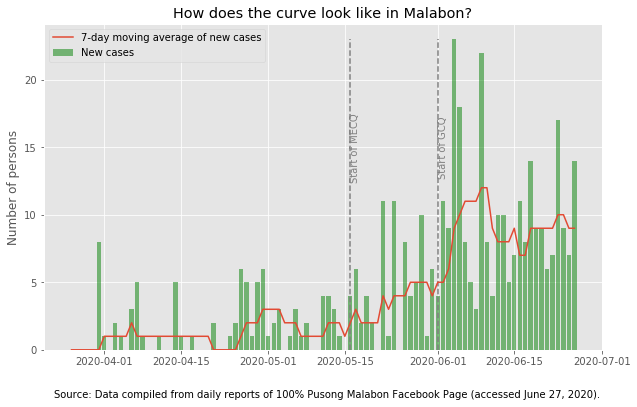

In [744]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df3.loc['Malabon City'].index, df3.loc['Malabon City', 'new_case'], color='green', alpha=0.5, label='New cases')
ax.plot(df3.loc['Malabon City', 'case_ma'], label='7-day moving average of new cases')
ax.vlines(df3.loc['Malabon City'].index[51], 0, 23, color='gray', linestyle='dashed')
ax.vlines(df3.loc['Malabon City'].index[67], 0, 23, color='gray', linestyle='dashed')
ax.text(df3.loc['Malabon City'].index[51], 15, 'Start of MECQ', verticalalignment='center', rotation=90, color='gray')
ax.text(df3.loc['Malabon City'].index[67], 15, 'Start of GCQ', verticalalignment='center', rotation=90, color='gray')
ax.legend(loc='upper left')
ax.set_ylabel('Number of persons')
ax.set_title('How does the curve look like in Malabon?')
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed June 27, 2020).', 
            (0,0), (10,-40), xycoords='axes fraction', textcoords='offset points', va='top')

plt.show()

Average daily cases has been rising since the start of MECQ, peaked in the first half of June, and plateaued at 10 infections everyday in the second half.

How does the fatality and recovery rates compare with the curve?

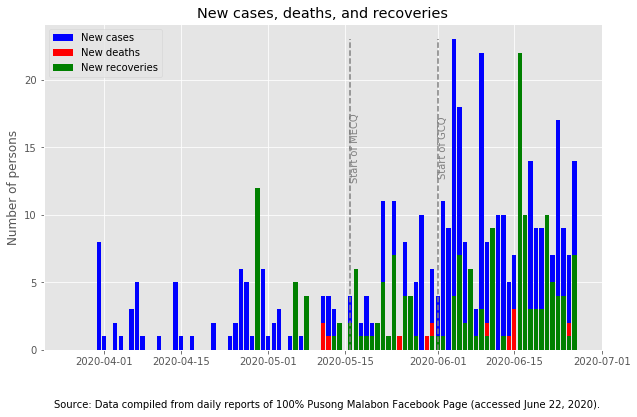

In [745]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df3.loc['Malabon City'].index, df3.loc['Malabon City', 'new_case'], color='blue', label='New cases')
ax.bar(df3.loc['Malabon City'].index, df3.loc['Malabon City', 'new_death'], color='red', label='New deaths')
ax.bar(df3.loc['Malabon City'].index, df3.loc['Malabon City', 'new_recovered'], color='green', label='New recoveries')
ax.vlines(df3.loc['Malabon City'].index[51], 0, 23, color='gray', linestyle='dashed')
ax.vlines(df3.loc['Malabon City'].index[67], 0, 23, color='gray', linestyle='dashed')
ax.text(df3.loc['Malabon City'].index[51], 15, 'Start of MECQ', verticalalignment='center', rotation=90, color='gray')
ax.text(df3.loc['Malabon City'].index[67], 15, 'Start of GCQ', verticalalignment='center', rotation=90, color='gray')
ax.legend(loc='upper left')
ax.set_ylabel('Number of persons')
ax.set_title('New cases, deaths, and recoveries')
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed June 22, 2020).', 
            (0,0), (10,-50), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

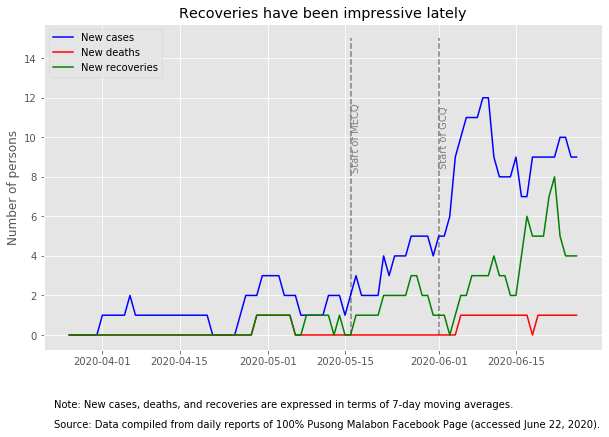

In [746]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df3.loc['Malabon City', 'case_ma'], label='New cases', color='blue')
ax.plot(df3.loc['Malabon City', 'death_ma'], label='New deaths', color='red')
ax.plot(df3.loc['Malabon City', 'recovered_ma'], label='New recoveries', color='green')
ax.vlines(df3.loc['Malabon City'].index[51], 0, 15, color='gray', linestyle='dashed')
ax.vlines(df3.loc['Malabon City'].index[67], 0, 15, color='gray', linestyle='dashed')
ax.text(df3.loc['Malabon City'].index[51], 10, 'Start of MECQ', verticalalignment='center', rotation=90, color='gray')
ax.text(df3.loc['Malabon City'].index[67], 10, 'Start of GCQ', verticalalignment='center', rotation=90, color='gray')
ax.legend(loc='upper left')
ax.set_ylabel('Number of persons')
ax.set_title('Recoveries have been impressive lately')
ax.annotate('Note: New cases, deaths, and recoveries are expressed in terms of 7-day moving averages.', (0,0), (10,-50), 
            xycoords='axes fraction', textcoords='offset points', va='top')
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed June 22, 2020).', 
            (0,0), (10,-70), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [747]:
df3.loc['Malabon City', ['recovered_ma', 'death_ma']].max()

recovered_ma    8
death_ma        1
dtype: int64

Recovery rate has been impressive late June, peaking 8 recoveries daily on average. Fatality rate, meanwhile, falls in 1-2 deaths per day on average.

Let's look at the barangay level. Let's rank according to confirmed cases.

In [748]:
df3.groupby(level=0).max().sort_values(by='confirmed', ascending=False).iloc[1:, 5:9]

,confirmed,death,recovered,violators
brgy_name,,,,
Longos,69,12,28,1231
Tonsuya,46,3,20,845
Tugatog,35,3,16,449
Potrero,32,2,18,1066
Catmon,29,7,11,1513
Tinajeros,28,7,13,235
Tanong,26,4,7,443
Ibaba,26,3,10,79
San Agustin,24,2,6,264


In [749]:
brgy_confirmed = df3.groupby(level=0).max().sort_values(by='confirmed', ascending=False).loc['Longos':, 'confirmed']

In [750]:
brgy_confirmed

brgy_name
Longos                 69
Tonsuya                46
Tugatog                35
Potrero                32
Catmon                 29
Tinajeros              28
Tanong                 26
Ibaba                  26
San Agustin            24
Bayan-Bayanan          20
Niugan                 15
Muzon                  10
Baritan                 9
Hulong Duhat            7
Dampalit                7
Concepcion              7
Panghulo                6
Acacia                  5
Maysilo                 5
Outside Malabon         4
Santulan                2
Flores                  2
Unconfirmed Address     1
Name: confirmed, dtype: int64

In [751]:
brgy_deaths = df3.groupby(level=0).max().sort_values(by='confirmed', ascending=False).loc['Longos':, 'death']

In [752]:
brgy_deaths

brgy_name
Longos                 12
Tonsuya                 3
Tugatog                 3
Potrero                 2
Catmon                  7
Tinajeros               7
Tanong                  4
Ibaba                   3
San Agustin             2
Bayan-Bayanan           4
Niugan                  1
Muzon                   1
Baritan                 0
Hulong Duhat            0
Dampalit                0
Concepcion              1
Panghulo                1
Acacia                  0
Maysilo                 1
Outside Malabon         0
Santulan                0
Flores                  1
Unconfirmed Address     0
Name: death, dtype: int64

In [753]:
brgy_recovered = df3.groupby(level=0).max().sort_values(by='confirmed', ascending=False).loc['Longos':, 'recovered']

In [754]:
brgy_recovered

brgy_name
Longos                 28
Tonsuya                20
Tugatog                16
Potrero                18
Catmon                 11
Tinajeros              13
Tanong                  7
Ibaba                  10
San Agustin             6
Bayan-Bayanan           5
Niugan                  8
Muzon                   1
Baritan                 2
Hulong Duhat            6
Dampalit                5
Concepcion              4
Panghulo                2
Acacia                  2
Maysilo                 0
Outside Malabon         3
Santulan                0
Flores                  1
Unconfirmed Address     0
Name: recovered, dtype: int64

In [755]:
brgy_active = df3.groupby(level=0).max().sort_values(by='confirmed', ascending=False).loc['Longos':, 'active']

In [756]:
brgy_active

brgy_name
Longos                 29
Tonsuya                28
Tugatog                17
Potrero                17
Catmon                 11
Tinajeros              10
Tanong                 15
Ibaba                  16
San Agustin            16
Bayan-Bayanan          13
Niugan                 10
Muzon                   8
Baritan                 7
Hulong Duhat            4
Dampalit                3
Concepcion              3
Panghulo                3
Acacia                  3
Maysilo                 4
Outside Malabon         4
Santulan                2
Flores                  2
Unconfirmed Address     1
Name: active, dtype: int64

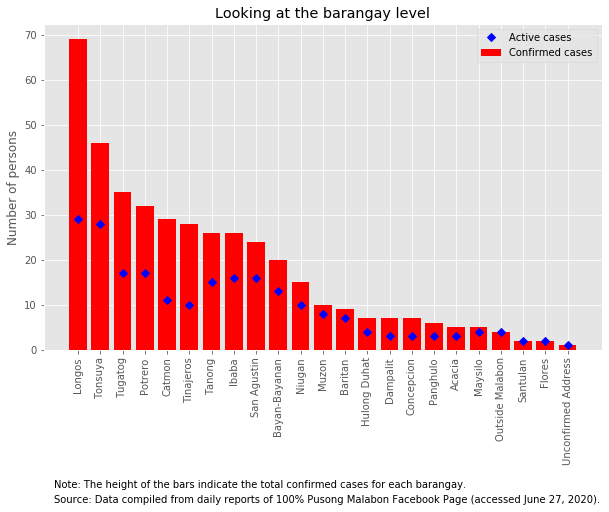

In [757]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(brgy_confirmed.index, brgy_confirmed, color='red', label='Confirmed cases')
ax.plot(brgy_active, 'bD', label='Active cases')
plt.xticks(rotation=90)
ax.set_title('Looking at the barangay level')
ax.set_xlabel('')
ax.set_ylabel('Number of persons')
ax.legend()
ax.annotate('Note: The height of the bars indicate the total confirmed cases for each barangay.', 
            (0,0), (10,-130), xycoords='axes fraction', textcoords='offset points', va='top')
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed June 27, 2020).', 
            (0,0), (10,-145), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

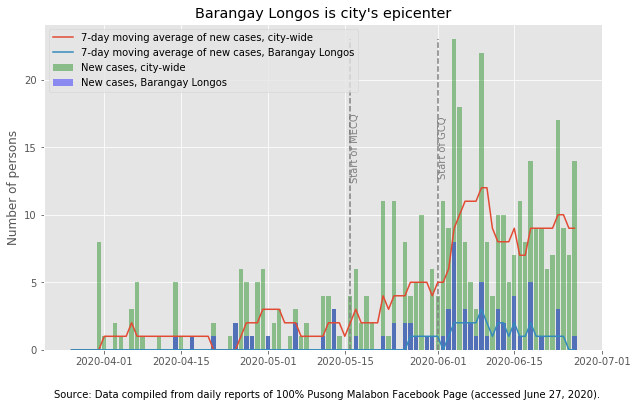

In [758]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df3.loc['Malabon City'].index, df3.loc['Malabon City', 'new_case'], color='green', alpha=0.4, label='New cases, city-wide')
ax.bar(df3.loc['Longos'].index, df3.loc['Longos', 'new_case'], color='blue', alpha=0.4, label='New cases, Barangay Longos')
ax.plot(df3.loc['Malabon City', 'case_ma'], label='7-day moving average of new cases, city-wide')
ax.plot(df3.loc['Longos', 'case_ma'], label='7-day moving average of new cases, Barangay Longos')
ax.vlines(df3.loc['Malabon City'].index[51], 0, 23, color='gray', linestyle='dashed')
ax.vlines(df3.loc['Malabon City'].index[67], 0, 23, color='gray', linestyle='dashed')
ax.text(df3.loc['Malabon City'].index[51], 15, 'Start of MECQ', verticalalignment='center', rotation=90, color='gray')
ax.text(df3.loc['Malabon City'].index[67], 15, 'Start of GCQ', verticalalignment='center', rotation=90, color='gray')
ax.legend(loc='upper left')
ax.set_ylabel('Number of persons')
ax.set_title('Barangay Longos is city\'s epicenter')
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed June 27, 2020).', 
            (0,0), (10,-40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

How does the story differ when we look at per capita terms?

In [759]:
confirmed_pc2 = df3.groupby(level=0).max().sort_values(by='confirmed', ascending=False).loc[:, 'confirmed_pc_4k']

In [760]:
confirmed_pc2

brgy_name
Malabon City            4
Longos                  5
Tonsuya                 4
Tugatog                 6
Potrero                 3
Catmon                  3
Tinajeros               6
Tanong                  7
Ibaba                  13
San Agustin             8
Bayan-Bayanan          10
Niugan                 10
Muzon                   7
Baritan                 3
Hulong Duhat            2
Dampalit                2
Concepcion              2
Panghulo                1
Acacia                  3
Maysilo                 1
Outside Malabon         0
Santulan                0
Flores                  1
Unconfirmed Address     0
Name: confirmed_pc_4k, dtype: int64

In [761]:
mask2 = confirmed_pc2.index.isin(['Malabon City', 'Outside Malabon', 'Unconfirmed Address'])

In [762]:
confirmed_pc2[~mask2]

brgy_name
Longos            5
Tonsuya           4
Tugatog           6
Potrero           3
Catmon            3
Tinajeros         6
Tanong            7
Ibaba            13
San Agustin       8
Bayan-Bayanan    10
Niugan           10
Muzon             7
Baritan           3
Hulong Duhat      2
Dampalit          2
Concepcion        2
Panghulo          1
Acacia            3
Maysilo           1
Santulan          0
Flores            1
Name: confirmed_pc_4k, dtype: int64

In [763]:
mask3 = brgy_confirmed.index.isin(['Malabon City', 'Outside Malabon', 'Unconfirmed Address'])

In [764]:
brgy_confirmed[~mask3]

brgy_name
Longos           69
Tonsuya          46
Tugatog          35
Potrero          32
Catmon           29
Tinajeros        28
Tanong           26
Ibaba            26
San Agustin      24
Bayan-Bayanan    20
Niugan           15
Muzon            10
Baritan           9
Hulong Duhat      7
Dampalit          7
Concepcion        7
Panghulo          6
Acacia            5
Maysilo           5
Santulan          2
Flores            2
Name: confirmed, dtype: int64

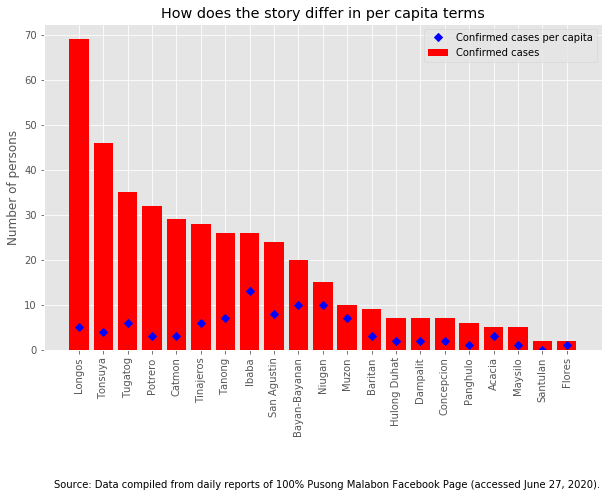

In [765]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(brgy_confirmed.index[~mask3], brgy_confirmed[~mask3], color='red', label='Confirmed cases')
ax.plot(confirmed_pc2[~mask2], 'bD', label='Confirmed cases per capita')
plt.xticks(rotation=90)
ax.set_title('How does the story differ in per capita terms')
ax.set_xlabel('')
ax.set_ylabel('Number of persons')
ax.legend()
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed June 27, 2020).', 
            (0,0), (10,-130), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

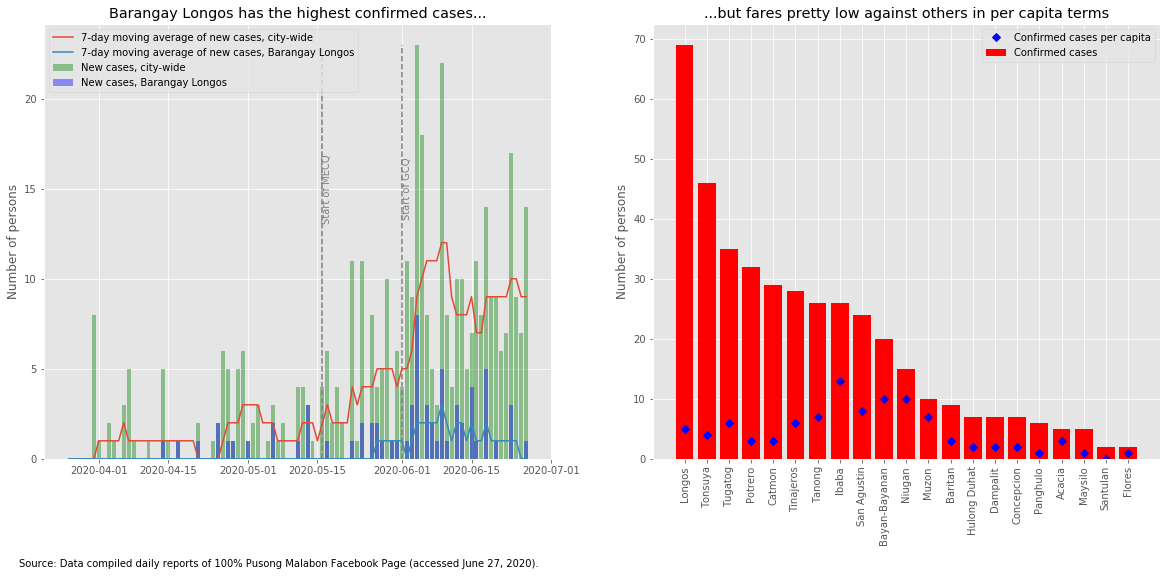

In [855]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

ax1.bar(df3.loc['Malabon City'].index, df3.loc['Malabon City', 'new_case'], color='green', alpha=0.4, label='New cases, city-wide')
ax1.bar(df3.loc['Longos'].index, df3.loc['Longos', 'new_case'], color='blue', alpha=0.4, label='New cases, Barangay Longos')
ax1.plot(df3.loc['Malabon City', 'case_ma'], label='7-day moving average of new cases, city-wide')
ax1.plot(df3.loc['Longos', 'case_ma'], label='7-day moving average of new cases, Barangay Longos')
ax1.vlines(df3.loc['Malabon City'].index[51], 0, 23, color='gray', linestyle='dashed')
ax1.vlines(df3.loc['Malabon City'].index[67], 0, 23, color='gray', linestyle='dashed')
ax1.text(df3.loc['Malabon City'].index[51], 15, 'Start of MECQ', verticalalignment='center', rotation=90, color='gray')
ax1.text(df3.loc['Malabon City'].index[67], 15, 'Start of GCQ', verticalalignment='center', rotation=90, color='gray')
ax1.legend(loc='upper left')
ax1.set_title('Barangay Longos has the highest confirmed cases...')
ax1.set_ylabel('Number of persons')
plt.xticks(rotation=90)

ax2.bar(brgy_confirmed.index[~mask3], brgy_confirmed[~mask3], color='red', label='Confirmed cases')
ax2.plot(confirmed_pc2[~mask2], 'bD', label='Confirmed cases per capita')
plt.xticks(rotation=90)
ax2.set_title('...but fares pretty low against others in per capita terms')
ax2.set_ylabel('Number of persons')
ax2.legend()

plt.annotate('Source: Data compiled daily reports of 100% Pusong Malabon Facebook Page (accessed June 27, 2020).', 
            (-1.25,0), (0,-100), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

Now let's look at violations.

In [775]:
df3.groupby(level=0).max().loc[:, 'confirmed'].sort_values(ascending=False)[~mask2]

brgy_name
Longos           69
Tonsuya          46
Tugatog          35
Potrero          32
Catmon           29
Tinajeros        28
Ibaba            26
Tanong           26
San Agustin      24
Bayan-Bayanan    20
Niugan           15
Muzon            10
Baritan           9
Hulong Duhat      7
Dampalit          7
Concepcion        7
Panghulo          6
Maysilo           5
Acacia            5
Flores            2
Santulan          2
Name: confirmed, dtype: int64

In [779]:
df3.groupby(level=0).max().sort_values(by=['confirmed'], ascending=False).loc[:, 'violators'][~mask2]

brgy_name
Longos           1231
Tonsuya           845
Tugatog           449
Potrero          1066
Catmon           1513
Tinajeros         235
Tanong            443
Ibaba              79
San Agustin       264
Bayan-Bayanan      75
Niugan             37
Muzon             151
Baritan           106
Hulong Duhat      340
Dampalit           77
Concepcion        847
Panghulo          174
Acacia            294
Maysilo           127
Santulan          162
Flores             78
Name: violators, dtype: int64

In [903]:
scatter_y1 = df3.groupby(level=0).max().loc[:, 'confirmed'].sort_values(ascending=False)[~mask2]
scatter_y3 = df3.groupby(level=0).max().sort_values(by=['confirmed'], ascending=False).loc[:, 'active'][~mask2]
scatter_x1 = df3.groupby(level=0).max().sort_values(by=['confirmed'], ascending=False).loc[:, 'violators'][~mask2]

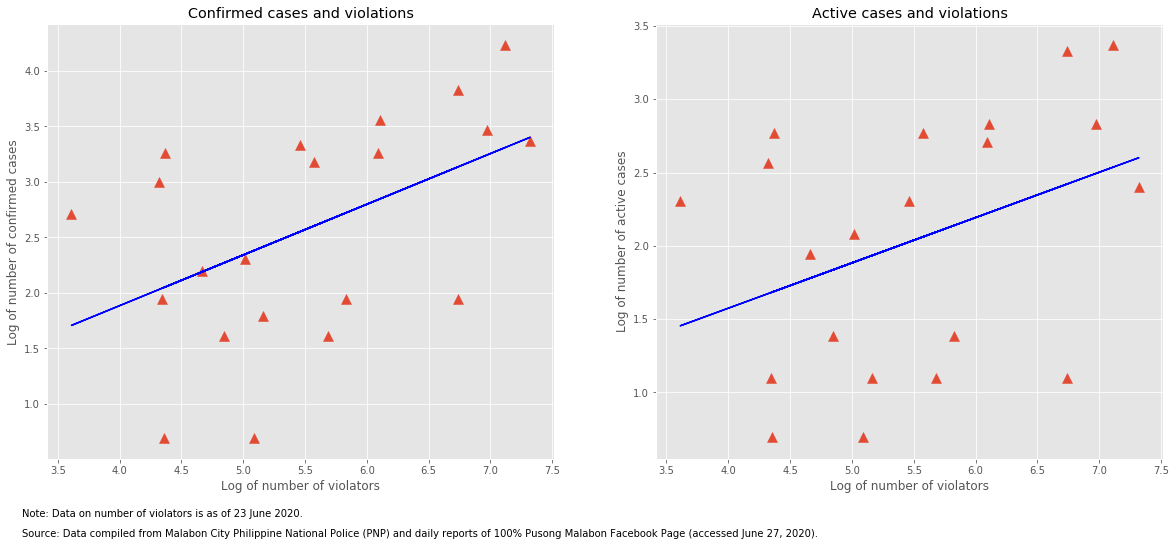

In [917]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

ax1.scatter(np.log(scatter_x1), np.log(scatter_y1), marker='^', s=100)
ax1.set_ylabel('Log of number of confirmed cases')
ax1.set_xlabel('Log of number of violators')
m1, b1 = np.polyfit(np.log(scatter_x1), np.log(scatter_y1), deg=1)
ax1.plot(np.log(scatter_x1), m1 * np.log(scatter_x1) + b1, color='blue')
ax1.set_title('Confirmed cases and violations')

ax2.scatter(np.log(scatter_x1), np.log(scatter_y3), marker='^', s=100)
ax2.set_ylabel('Log of number of active cases')
ax2.set_xlabel('Log of number of violators')
m2, b2 = np.polyfit(np.log(scatter_x1), np.log(scatter_y3), deg=1)
ax2.plot(np.log(scatter_x1), m2 * np.log(scatter_x1) + b2, color='blue')
ax2.set_title('Active cases and violations')

plt.annotate('Note: Data on number of violators is as of 23 June 2020.', 
            (-1.25,0), (0,-50), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('Source: Data compiled from Malabon City Philippine National Police (PNP) and daily reports of 100% Pusong Malabon Facebook Page (accessed June 27, 2020).', 
            (-1.25,0), (0,-70), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()    

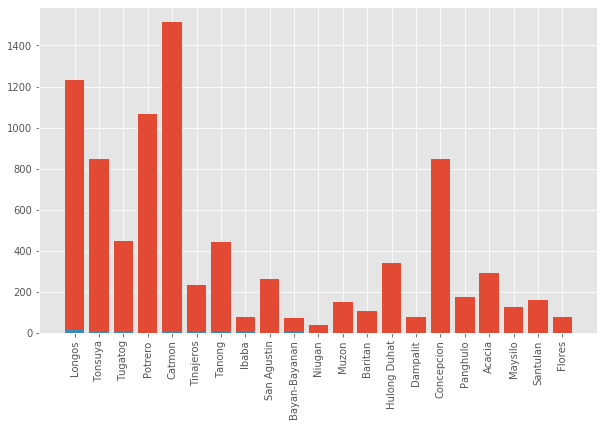

In [919]:
sbar = df3.groupby(level=0).max().sort_values(by=['confirmed'], ascending=False).loc[:, 'violators'][~mask2]
ddot = df3.groupby(level=0).max().sort_values(by=['confirmed'], ascending=False).loc[:, 'death'][~mask2]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(sbar.index, sbar)
ax1.bar(ddot.index, ddot)
plt.xticks(rotation=90)

plt.show()

10